CP321 Project

Name: Pan Zhang 

Student Number: 180108960 


Main idear: As a international student,the annual tuition expenses account for most of my personal expenses. Then, I want to know more about the fees charged by various provinces of Canada for international undergraduate students among different  fields to compare whether my personal tuition expenses are reasonable?

Reference: All the data that I used in my poroject is from https://open.canada.ca/data/en/dataset/1f02b37f-dcba-4546-816f-e592f6264e97

First, let's see the raw data.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./37100005.csv')
df

,REF_DATE,GEO,DGUID,Field of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006/2007,Canada,2016A000011124,"Total, field of study",Current dollars,75,units,0,v1001414713,1.19,13378.0,NaN,NaN,NaN,0
1,2006/2007,Canada,2016A000011124,Education,Current dollars,75,units,0,v62427452,1.10,11818.0,NaN,NaN,NaN,0
2,2006/2007,Canada,2016A000011124,"Visual and performing arts, and communications...",Current dollars,75,units,0,v62427461,1.20,12784.0,NaN,NaN,NaN,0
3,2006/2007,Canada,2016A000011124,Humanities,Current dollars,75,units,0,v62427462,1.30,13313.0,NaN,NaN,NaN,0
4,2006/2007,Canada,2016A000011124,"Social and behavioural sciences, and legal stu...",Current dollars,75,units,0,v62427463,1.40,12614.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2020/2021,Yukon,2016A000260,Nursing,Current dollars,75,units,0,v1210490551,12.14,NaN,..,NaN,NaN,0
2657,2020/2021,Yukon,2016A000260,Pharmacy,Current dollars,75,units,0,v1210490552,12.15,NaN,..,NaN,NaN,0
2658,2020/2021,Yukon,2016A000260,Veterinary medicine,Current dollars,75,units,0,v1210490553,12.16,NaN,..,NaN,NaN,0
2659,2020/2021,Yukon,2016A000260,"Other health, parks, recreation and fitness",Current dollars,75,units,0,v1210490554,12.17,NaN,..,NaN,NaN,0


The data in the file contains the fees charged by Canadian provinces to international students in different majors from 2006 to 2021. Let's get straight to the see the main point and compare the average tuition fees of various field in Ontario and Quebec in the most recent year, 2021. The bar chart is good to use due to the need for comparsion. Otherwise, I hightlight the computer science which is my major for better comparsion. 

The average tuition fees is 45085.89473684211 , 24931.61111111111


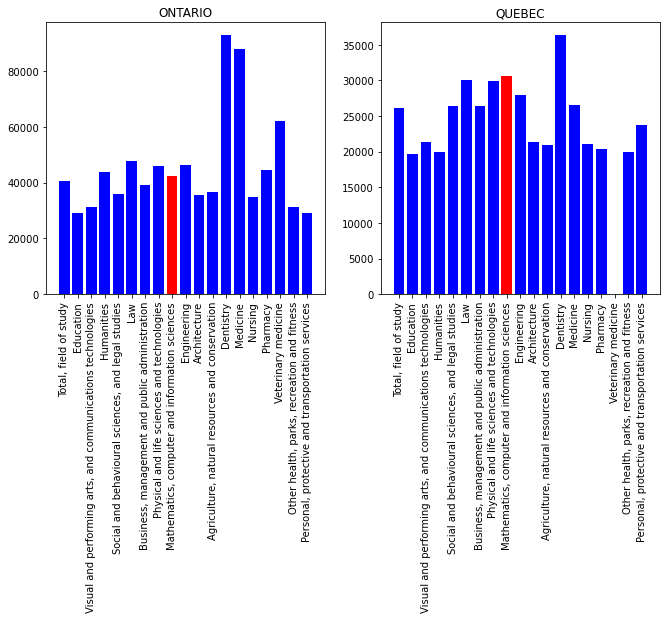

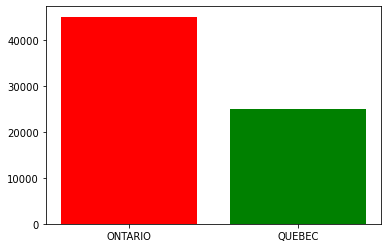

In [2]:
sub_ONTARIO = df.loc[df["GEO"] == "Ontario"]
sub_QUEBEC = df.loc[df["GEO"] == "Quebec"]

sub_ONTARIO_2021 = sub_ONTARIO.loc[sub_ONTARIO["REF_DATE"] == "2020/2021"]
sub_QUEBEC_2021 = sub_QUEBEC.loc[sub_QUEBEC["REF_DATE"] == "2020/2021"]

average_ONTARIO = sub_ONTARIO_2021["VALUE"].mean()
average_QUEBEC = sub_QUEBEC_2021["VALUE"].mean()

print("The average tuition fees is", average_ONTARIO, ",", average_QUEBEC)

import matplotlib.pyplot as plt

color = []

sub_ONTARIO_2021 = sub_ONTARIO_2021.reset_index(drop=True)
sub_QUEBEC_2021 = sub_QUEBEC_2021.reset_index(drop=True)

for  i in range(sub_ONTARIO_2021.shape[0]):
    if(sub_ONTARIO_2021["Field of study"][i] == "Mathematics, computer and information sciences"):
        color.append("red")
    else:
        color.append("blue")

plt.figure(figsize=(11,5))

plt.subplot(121)

plt.title("ONTARIO")

plt.bar(sub_ONTARIO_2021["Field of study"], sub_ONTARIO_2021["VALUE"], color=color)

plt.xticks(rotation=90)
plt.subplot(122)
plt.title("QUEBEC")
plt.bar(sub_QUEBEC_2021["Field of study"], sub_QUEBEC_2021["VALUE"], color=color)
plt.bar([1,2],[2,3])
plt.xticks(rotation=90)

plt.show()


plt.bar(["ONTARIO", "QUEBEC"], [average_ONTARIO, average_QUEBEC], color=["red", "green"])

plt.show()

Finding: The two bar charts near the top demonstrates the average tuition fees charged by Ontario and Quebec among different field. Here is some interesting facts that Dentistry is the most expensive field in the two provinces and the less tuition fees in Education. If the computer field is discussed separately, the average tuition fee in Ontario is nearly $10,000 more than Quebec per year. The figure below the two bar graphs shows the total average tuition fee between Ontario and Quebec. We can find that Ontario’s tuition fees are twice as high as Quebec’s per year.

As a student major in computer science, I am interested in the changes in tuition of my major from 2006 to the present. Time series is good to use here.

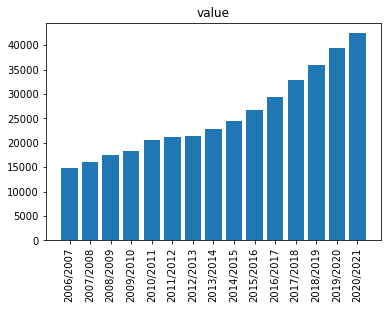

In [3]:

sub_ONTARIO = df.loc[df["GEO"] == "Ontario"]

sub_ONTARIO_computer = sub_ONTARIO.loc[sub_ONTARIO["Field of study"] == "Mathematics, computer and information sciences"]

import matplotlib.pyplot as plt

plt.bar(sub_ONTARIO_computer["REF_DATE"], sub_ONTARIO_computer["VALUE"])
plt.title("value")
plt.xticks(rotation=90)
plt.show()

Finding: In general, the computer profession has grown slowly from the data in 2006 to 2013, but it has grown rapidly from 2013 to 2021.

Here is the little tool to help you to search the specific value based on your province, field and time.


Abbreviation of fields:

Education : edu

Visual and performing arts, and communications technologies: vpact

Humanities: hum

Social and behavioural sciences, and legal studies: sbc

Law: law

Business, management and public administration: bmp

Physical and life sciences and technologies: plt

Mathematics, computer and information sciences: mcs

Engineering: eng

Architecture: arc

Agriculture, natural resources and conservation: anr

Medicine:med

Other health, parks, recreation and fitness: hpr


In [4]:
def search(GEO, field, time):
    dirc = {"edu":"Education", "vpact":"Visual and performing arts, and communications technologies", "hum":"Humanities",
    "sbc": "Social and behavioural sciences, and legal studies", "law":"Law", "bmp":"Business, management and public administration",
    "plt":"Physical and life sciences and technologies", "mcs":"Mathematics, computer and information sciences", "eng":"Engineering",
    "arc":"Architecture", "anr":"Agriculture, natural resources and conservation", "med":"Medicine","hpr":"Other health, parks, recreation and fitness"}

    a = df.loc[df["GEO"] == GEO]

    b = a.loc[a["Field of study"] == dirc[field]]

    time = time + "/" + str(int(time) + 1)

    c = b.loc[b["REF_DATE"] == time]

    c = c.reset_index(drop=True)

    return c["VALUE"][0]

geo = input("Enter your province: ")
field = input("Enter your field(remember to enter the abbreviation): ")
time = input("Enter the time you wanna search for: ")
print(search(geo,field, time))
#example testing
#Enter your province: Ontario
#Enter your field: mcs
#Enter the time you wanna search for: 2020
#42444.0
def addition(a,b,c):
    return a + b + c
#2018 35920.0
#2019 39476.0
#2020 42444.0
print(addition(35920.0, 39476.0, 42444.0))


Enter your province: Ontario
Enter your field(remember to enter the abbreviation): mcs
Enter the time you wanna search for: 2020
42444.0
117840.0


Result: Back to my question, I can get the average tuition fee for international students in Ontario since I enrolled in 2018 which is 117840.0. Then, I could go loris to check my student accound and get final number 103484 which is less than the average tuituion fee in Ontario.
